# Ký hiệu Ngôn Ngữ Cử Bàn Tay Sử Dụng CNN Để Huấn Luyện




In [1]:
# thêm các thư viện
import numpy as np  #thư viện numpy
import pandas as pd    #thư viện pandas
import matplotlib.pyplot as plt # thư viện matplotlib 
import seaborn as sns # thư viện searborn vẽ biểu đồ
from spellchecker import SpellChecker

In [33]:
# ở đây khai báo dữ liệu để huấn luyện ( sử dụng dữ liệu từ kaggle các tọa độ điểm ảnh cử chỉ được tạo sẵn)
data=train = pd.read_csv('sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test/sign_mnist_test.csv')

In [3]:
# kiểm tra dữ liệu được thêm vào
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
# tạo nhãn huấn luyện 
labels = train['label'].values

In [34]:
df=data[(data['label']==0) | (data['label']==4) | (data['label']==12) | (data['label']==18)]

In [6]:
#xem các nhãn tổng cộng có 24 nhãn tương đương bảng chữ cái 24 chữ
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:xlabel='count'>

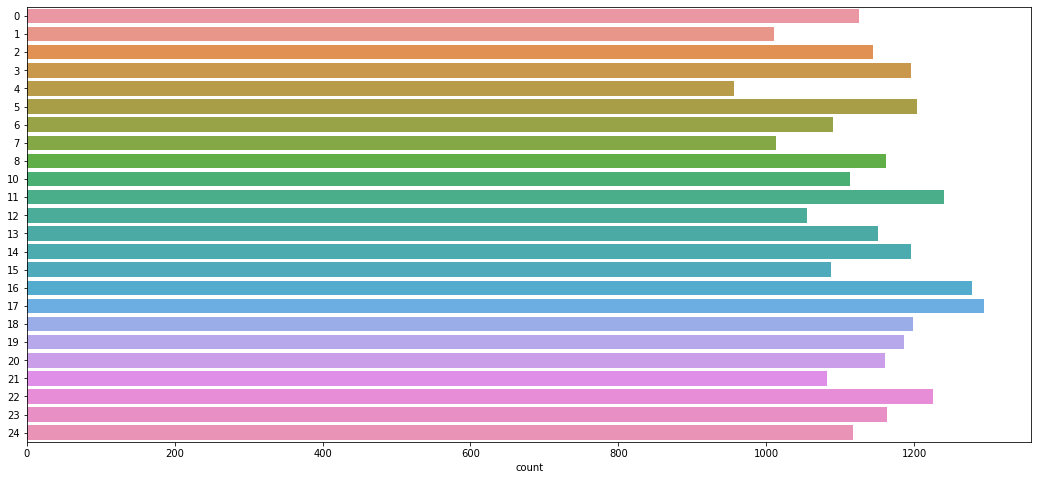

In [7]:
# Vẽ biểu đồ từ các nhãn được khai báo
plt.figure(figsize = (18,8))
sns.countplot(y =labels)

In [8]:
# bỏ nhãn để dữ liệu về dạng chuỗi số để dễ dàng huấn luyện 
train.drop('label', axis = 1, inplace = True)

In [9]:
# Trích xuất những hình ảnh dữ liệu csv từ mỗi hàng của chúng tôi trong lưu trữ nhớ nó trong một hàng của 784 cột
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [10]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [11]:
# mã hóa dữ liệu các nhãn được tách ra trước đó
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [12]:
# xem các nhãn được mã hóa
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


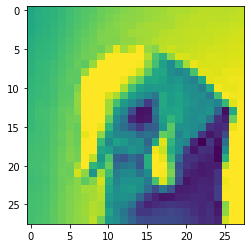

In [13]:
# kiểm tra hình ảnh
index = 5
print(labels[index])
plt.imshow(images[index].reshape(28,28)) # định dạng kích thước hình ảnh trích xuất

In [72]:
# Sử dụng OpenCV để xem 20 hình ảnh ngẫu nhiên từ dữ liệu đào tạo
import cv2
import numpy as np

for i in range(0,20):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=20, fy=20, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0) 
    
cv2.destroyAllWindows()

In [15]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Chia dữ liệu của chúng tôi thành x_train, x_test, y_train và y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [17]:
# sử dụng thư viện tensorflow để xác định kích thước của từng tập dữ liệu huấn luyện
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 200
num_classes = 24
epochs = 10

In [18]:
# chia tỉ lệ hình ảnh
x_train = x_train / 255
x_test = x_test / 255

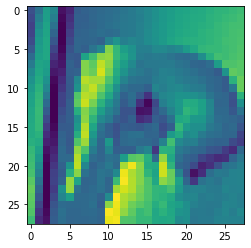

In [19]:
# định hình kích thước yêu cầu theo thư viện
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[1].reshape(28,28))

In [20]:
# tạo mô hình để huấn luyện sử dụng thuật toán CNN để huấn luyện mô hình
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam 

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(256, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [21]:
# Biên dịch mô hình 
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [23]:
# Huấn Luyện Mô hình''
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
97/97 [==============================] - 23s 225ms/step - loss: 2.3942 - accuracy: 0.2705 - val_loss: 1.2152 - val_accuracy: 0.6312
Epoch 2/10
97/97 [==============================] - 21s 220ms/step - loss: 0.9800 - accuracy: 0.6759 - val_loss: 0.5320 - val_accuracy: 0.8461
Epoch 3/10
97/97 [==============================] - 22s 224ms/step - loss: 0.5343 - accuracy: 0.8212 - val_loss: 0.3704 - val_accuracy: 0.8839
Epoch 4/10
97/97 [==============================] - 22s 222ms/step - loss: 0.2996 - accuracy: 0.9044 - val_loss: 0.1739 - val_accuracy: 0.9496
Epoch 5/10
97/97 [==============================] - 22s 224ms/step - loss: 0.1720 - accuracy: 0.9484 - val_loss: 0.0838 - val_accuracy: 0.9803
Epoch 6/10
97/97 [==============================] - 23s 232ms/step - loss: 0.1029 - accuracy: 0.9718 - val_loss: 0.0375 - val_accuracy: 0.9956
Epoch 7/10
97/97 [==============================] - 22s 232ms/step - loss: 0.0642 - accuracy: 0.9851 - val_loss: 0.0230 - val_accuracy: 0.9985

In [24]:
# lưu mô hình được huấn luyện
model.save("CNN.h5")
print("Model Saved")

Model Saved


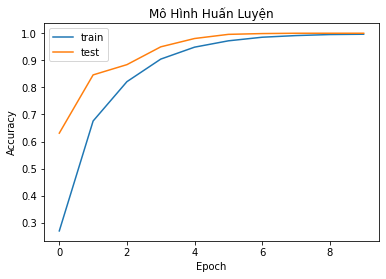

In [25]:
# xem quá trình huấn luyện thông qua biểu đồ
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Mô Hình Huấn Luyện")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'])

plt.show()

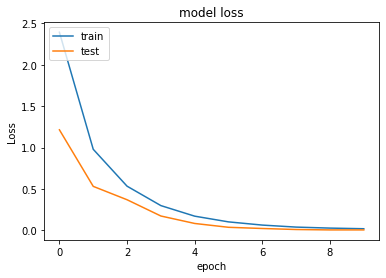

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [27]:
# Định hình dữ liệu trước khi kiểm tra
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)

In [28]:
# Độ chính xác sau khi huấn luyện
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.838957055214724

In [35]:
y_test=test['label']
x_test=test.drop('label',axis=1)
x_test=x_test.values
x_test=x_test.reshape(-1,28,28,1)

In [36]:
import keras
model2=keras.models.load_model("CNN.h5")
dic={0:0,1:4,2:12,3:18}
def model_pred(data,new_model):
    img = np.array(data)/255
    img = img.reshape(1,28,28,1)
    result = new_model.predict(img)
    result=np.argmax(result)
    if result>=9:
         result=result+1
    return result

In [37]:
def model2_pred(data,new_model):
    img = np.array(data)/255
    img = img.reshape(1,28,28,1)
    result = new_model.predict(img)
    result=np.argmax(result)
    if result>=9:
        result=result+1
    return result

In [38]:
lst=[]
for x in x_test:
    prediction=model2_pred(x,model2)
    if prediction ==0 or prediction==4 or prediction ==12 or prediction ==18 :
#         print(prediction)
        prediction=model_pred(x,model)
    lst.append(prediction)

In [39]:
lst[10:20]

[8, 8, 21, 12, 7, 4, 22, 0, 7, 7]

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lst)

0.9060234244283324

In [41]:
from sklearn.metrics import classification_report
print (classification_report(y_test,lst))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      0.98      0.99       432
           2       0.94      1.00      0.97       310
           3       0.98      1.00      0.99       245
           4       0.96      0.97      0.96       498
           5       1.00      1.00      1.00       247
           6       0.93      0.75      0.83       348
           7       0.94      0.95      0.95       436
           8       0.80      0.87      0.83       288
          10       0.93      0.95      0.94       331
          11       0.79      1.00      0.88       209
          12       0.82      0.83      0.83       394
          13       0.94      0.85      0.89       291
          14       1.00      0.83      0.91       246
          15       1.00      1.00      1.00       347
          16       0.81      0.90      0.85       164
          17       0.58      0.95      0.72       144
          18       0.83    

In [42]:
y_test[10:20]

10     8
11     8
12    21
13    12
14     7
15     4
16    22
17     0
18     7
19     7
Name: label, dtype: int64

In [43]:
model.save("second_model.h5")